# Practice: Principal Component Analysis (PCA)
- Apply PCA to the Wine Dataset from Scikit-Learn
- Analyze the explained variance and visualize the results

Explained Variance Ratio:  [0.36198848 0.1920749 ]


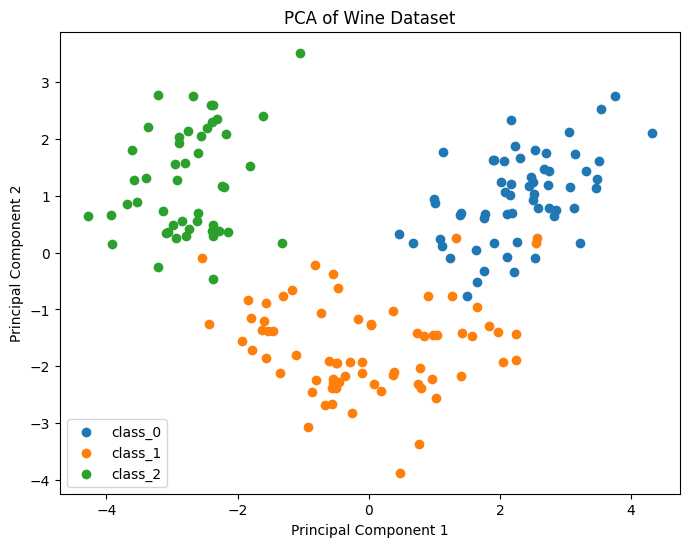

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load Wine Dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Standarizing the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained Variance Ratio
print('Explained Variance Ratio: ', pca.explained_variance_ratio_)

# Visualize the reduced data
plt.figure(figsize=(8,6))
for i,target_name in enumerate(data.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.legend()
plt.show()


__Challenge__
Use PCA to preprocess the dataset before applying a clasification model (e.g. Logistic Regression or Random Forest), compare the accuracy before and after PCA.

In [1]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
# logreg = LogisticRegression(C=1e5)
# X_logreg = logreg.fit(X_pca, y)

# plt.figure(figsize=(8,6))
# for i,target_name in enumerate(data.target_names):
#     plt.scatter(X_logreg[y == i, 0], X_logreg[y == i, 1], label=target_name)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of Wine Dataset')
# plt.legend()
# plt.show()

In [3]:
import os
import shutil
from kaggle.api.kaggle_api_extended import KaggleApi

def load_kaggle_dataset(dataset, extract_folder_path, csv_name):
    # Initialize API
    api = KaggleApi()
    api.authenticate()

    # Download dataset
    extracted_folder_path = extract_folder_path
    dataset = dataset
    csv_name = extract_folder_path+'/'+csv_name

    api.dataset_download_files(dataset, path=extracted_folder_path, unzip=True)

    df = pd.read_csv(csv_name)
    return df

def clean_up(extracted_folder_path):
    if os.path.exists(extracted_folder_path):
        shutil.rmtree(extracted_folder_path)

import numpy as np 
import pandas as pd
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

if __name__ == '__main__':
    # Load Dataset from Kaggle
    dataset_name = 'zalando-research/fashionmnist'
    extract_path = '../../Kaggle_Datasets/mnist'
    csv_name = 'fashion-mnist_train.csv'
    df = load_kaggle_dataset(dataset_name, extract_path, csv_name)

    X = df.drop('pixel1', axis=1) # Features
    y = df['pixel1'] # Target

    # Standarizing the Data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Visualize the reduce data
    plt.figure(figsize=(8, 6))
    for i, target_name in enumerate(df.target_names):
        plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], label=target_name)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Fashion Mnist Kaggle')
    plt.legend()
    plt.show()

Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist


AttributeError: 'DataFrame' object has no attribute 'target_names'

<Figure size 800x600 with 0 Axes>

In [ ]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the t-SNE results
plt.figure(figsize=(8, 6))
# for i, target_name in enumerate(data)
